In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# !pip install indic-nlp-library

In [11]:
import pandas as pd
import re
import random
from indicnlp.tokenize import indic_tokenize

file_name = '/content/drive/MyDrive/Datasets_HateSpeech/Marathi/Marathi_4Class.csv'
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_name, encoding='utf-8')
df.head()

,Post,Labels Set,Dataset
0,ते साड्यांची वअजागळ सूटची किम्मत व पार्टीत कित...,HATE,hate_test
1,घोटाळेबाज सेनेचा आमदार प्रताप सरनाईक यांच्या घ...,HATE,hate_test
2,ज्याच्यावर 50 लाखांचे इनाम सरकारने लावले होते ...,HATE,hate_test
3,मोदी-भाजपद्वेष आणि भारतद्वेष-देशद्रोह ह्यातील ...,HATE,hate_test
4,सुरुवात कुणी केली होती..? गुजराती ड्रग्ज माफिय...,HATE,hate_test


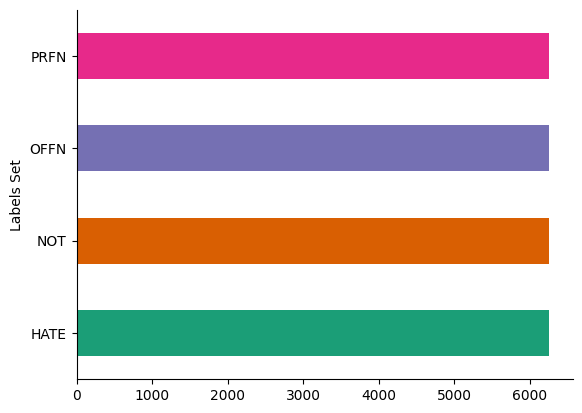

In [12]:
# @title Labels Set

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Labels Set').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

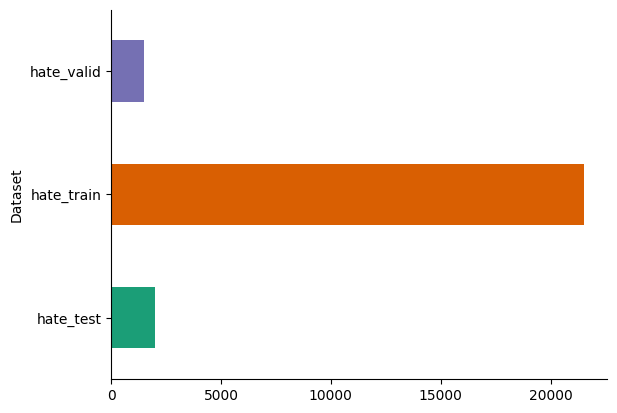

In [31]:
# @title Dataset

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Dataset').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
# # Remove rows with 'FAKE' label
# df = df[df['Labels Set'] != 'fake']

# #Print length of the dataset
# print("Length of the dataset: ", len(df))

In [15]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]
if not duplicate_rows.empty:
    print("Duplicate rows found. Removing duplicates...")
    df.drop_duplicates(inplace=True)

# Check for NaN values
nan_rows = df[df.isna().any(axis=1)]
if not nan_rows.empty:
    print("Rows with NaN values found. Removing...")
    df.dropna(inplace=True)

# Print length of the dataset after removing duplicates and NaN values
print("Length of the dataset after cleaning: ", len(df))

Length of the dataset after cleaning:  25000


In [21]:
df.head()

,Post,Labels Set,Dataset
0,ते साड्यांची वअजागळ सूटची किम्मत व पार्टीत कित...,HATE,hate_test
1,घोटाळेबाज सेनेचा आमदार प्रताप सरनाईक यांच्या घ...,HATE,hate_test
2,ज्याच्यावर 50 लाखांचे इनाम सरकारने लावले होते ...,HATE,hate_test
3,मोदी-भाजपद्वेष आणि भारतद्वेष-देशद्रोह ह्यातील ...,HATE,hate_test
4,सुरुवात कुणी केली होती..? गुजराती ड्रग्ज माफिय...,HATE,hate_test


In [22]:
# import re

# def remove_emojis(text):
#     # Define a regular expression pattern to match emojis
#     emoji_pattern = re.compile("["
#                                u"\U0001F600-\U0001F64F"  # emoticons
#                                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#                                u"\U0001F680-\U0001F6FF"  # transport & map symbols
#                                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                                u"\U00002500-\U00002BEF"  # chinese char
#                                u"\U00002702-\U000027B0"
#                                u"\U00002702-\U000027B0"
#                                u"\U000024C2-\U0001F251"
#                                u"\U0001f926-\U0001f937"
#                                u"\U00010000-\U0010ffff"
#                                u"\u2640-\u2642"
#                                u"\u2600-\u2B55"
#                                u"\u200d"
#                                u"\u23cf"
#                                u"\u23e9"
#                                u"\u231a"
#                                u"\ufe0f"  # dingbats
#                                u"\u3030"
#                                "]+", flags=re.UNICODE)

#     # Remove emojis from the text using the pattern
#     return emoji_pattern.sub(r'', text)

In [23]:
# Function to preprocess text
def preprocess_text(text):
    # Remove mentions, email addresses, URLs, RT (retweet)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Remove mentions
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', text)  # Remove email addresses
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'RT\s*@\S+', '', text)  # Remove retweets
    # Remove HTML tags (if any)
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation marks (comma and purnviram)
    text = re.sub(r'[\u002C\u0964]', '', text)
    # Remove special characters and accented characters
    text = re.sub(r'[^\u0900-\u097F\s]', '', text)
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)
    # Strip leading/trailing whitespaces
    text = text.strip()
    return text

In [24]:
preprocess_text("ते साड्यांची वअजागळ सूटची किम्मत व पार्टीत किती खर्च झाला ते चीचा ट्वीट करणार का?!!दहेज कितना दिया?")

'ते साड्यांची वअजागळ सूटची किम्मत व पार्टीत किती खर्च झाला ते चीचा ट्वीट करणार कादहेज कितना दिया'

In [25]:
# Preprocess the 'Post' column
df['Processed_Post'] = df['Post'].apply(preprocess_text)
#df['Processed_Post'] = df['Post'].apply(remove_emojis)

df.head(10)

,Post,Labels Set,Dataset,Processed_Post
0,ते साड्यांची वअजागळ सूटची किम्मत व पार्टीत कित...,HATE,hate_test,ते साड्यांची वअजागळ सूटची किम्मत व पार्टीत कित...
1,घोटाळेबाज सेनेचा आमदार प्रताप सरनाईक यांच्या घ...,HATE,hate_test,घोटाळेबाज सेनेचा आमदार प्रताप सरनाईक यांच्या घ...
2,ज्याच्यावर 50 लाखांचे इनाम सरकारने लावले होते ...,HATE,hate_test,ज्याच्यावर लाखांचे इनाम सरकारने लावले होते त्य...
3,मोदी-भाजपद्वेष आणि भारतद्वेष-देशद्रोह ह्यातील ...,HATE,hate_test,मोदीभाजपद्वेष आणि भारतद्वेषदेशद्रोह ह्यातील पु...
4,सुरुवात कुणी केली होती..? गुजराती ड्रग्ज माफिय...,HATE,hate_test,सुरुवात कुणी केली होती गुजराती ड्रग्ज माफिया न...
5,@Shindenileshk @sachin_inc सगळे काँग्रेसी हे ख...,HATE,hate_test,सगळे काँग्रेसी हे खरंतर खानग्रेसी आहेत जन्माला...
6,आहेत? हा नक्षली होता की तुमचा जावई इतका मानसन्...,HATE,hate_test,आहेत हा नक्षली होता की तुमचा जावई इतका मानसन्म...
7,@TV9Marathi कोणाचे कसे भांडणे लावून देयचे हे य...,HATE,hate_test,कोणाचे कसे भांडणे लावून देयचे हे या भिकारचोट प...
8,@IndiaToday @AishPaliwal बोलविते धनी आले. फडणव...,HATE,hate_test,बोलविते धनी आले फडणवीस नीच माणसाने या नशेडी ला...
9,@Awhadspeaks याचा अर्थ हे लोक किती निच वृत्तीच...,HATE,hate_test,याचा अर्थ हे लोक किती निच वृत्तीची आहेत हे सिद...


## Code to save the files

In [26]:
set(df["Labels Set"])

{'HATE', 'NOT', 'OFFN', 'PRFN'}

In [27]:
df['Labels 4'] = df["Labels Set"]

In [30]:
mapping_dict = {'HATE': 1, 'OFFN': 1, 'PRFN': 1, 'NOT': 0}
df["Labels Set"] = df["Labels Set"].map(mapping_dict)

In [32]:
train_df_ = df[df["Dataset"] == 'hate_train'].copy()
test_df_ = df[df["Dataset"] == 'hate_test'].copy()

train_hate_df = train_df_[train_df_["Labels Set"] == 0].copy()
train_non_hate_df = train_df_[train_df_["Labels Set"] == 1].copy()

test_hate_df = test_df_[test_df_['Labels Set'] == 0].copy()
test_non_hate_df = test_df_[test_df_['Labels Set'] == 1].copy()

train_sampled_hate_df = train_hate_df.sample(n=2000, random_state=42)
train_sampled_non_hate_df = train_non_hate_df.sample(n=2000, random_state=42)

test_sampled_hate_df = test_hate_df.sample(n=500, random_state=42)
test_sampled_non_hate_df = test_non_hate_df.sample(n=500, random_state=42)

train_concatenated_df = pd.concat([train_sampled_hate_df, train_sampled_non_hate_df], axis=0)
train_df = train_concatenated_df.sample(frac=1, random_state=42).reset_index(drop=True)

test_concatenated_df = pd.concat([test_sampled_hate_df, test_sampled_non_hate_df], axis=0)
test_df = test_concatenated_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [38]:
train_df[train_df['Labels 4'] == 'HATE']

,Post,Labels Set,Dataset,Processed_Post,Labels 4
4,मुलींच्या दागिन्यांमध्ये डुकराचे 2-4 केस गुंफा...,1,hate_train,मुलींच्या दागिन्यांमध्ये डुकराचे केस गुंफायला ...,HATE
10,सोषल मिडीयावरच्या स्त्रीया/मुली ह्या तुमच्या घ...,1,hate_train,सोषल मिडीयावरच्या स्त्रीयामुली ह्या तुमच्या घर...,HATE
14,@imurAlisha छपरी स्टाईल,1,hate_train,छपरी स्टाईल,HATE
22,"युरेशियन संघोट्या चोमूंनो, आता वाजवा टाळ्या.",1,hate_train,युरेशियन संघोट्या चोमूंनो आता वाजवा टाळ्या,HATE
24,ससिन सावंट हे शेवटी खाँग्रेसी मेंदू ग्रासलेला ...,1,hate_train,ससिन सावंट हे शेवटी खाँग्रेसी मेंदू ग्रासलेला ...,HATE
...,...,...,...,...,...
3974,@ShefVaidya आर्यन खान साठी पण समोर नाही आले हे...,1,hate_train,आर्यन खान साठी पण समोर नाही आले हे भाडखाऊ कलाक...,HATE
3981,तालिबान हे प्रोपौगंडा करण्यात तरबेज आहेत असं द...,1,hate_train,तालिबान हे प्रोपौगंडा करण्यात तरबेज आहेत असं द...,HATE
3982,किसानआंदोलना मुळे ट्रॅफिक जाम होतय असं म्हणणार...,1,hate_train,किसानआंदोलना मुळे ट्रॅफिक जाम होतय असं म्हणणार...,HATE
3993,@Sonalimumbai1 हे सरकार आल्यापासून तळतळाट घेतय...,1,hate_train,हे सरकार आल्यापासून तळतळाट घेतय सर्वसामान्यांच...,HATE


In [39]:
# Define the new filename for saving the preprocessed data
train_file = file_name.split('.')[0] + '_train.csv'

# Save the preprocessed data to a new CSV file
train_df.to_csv(train_file, index=False, encoding='utf-8')

In [40]:
# Define the new filename for saving the preprocessed data
test_file = file_name.split('.')[0] + '_test.csv'

# Save the preprocessed data to a new CSV file
test_df.to_csv(test_file, index=False, encoding='utf-8')